In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from functions import *

In [3]:
os.getcwd()

'c:\\Users\\USER\\Desktop\\컴퓨터비전개론\\Excercise1'

In [4]:
img = cv2.imread("Sample Images/shapes.png", cv2.IMREAD_GRAYSCALE)

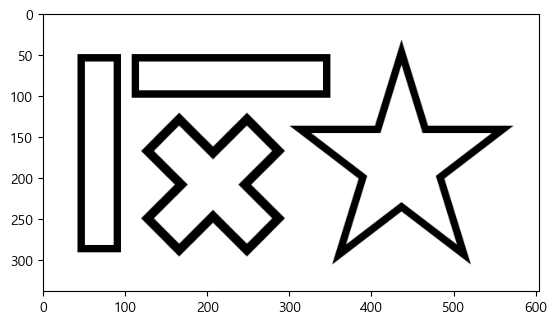

In [5]:
plt.imshow(img, cmap="gray")
plt.show()

#### Part1. Image Filtering

1-1. Image Filtering by Cross-Correation

a) Implement two functions that return cross-correlation between an image and a 1D/2D kernel:

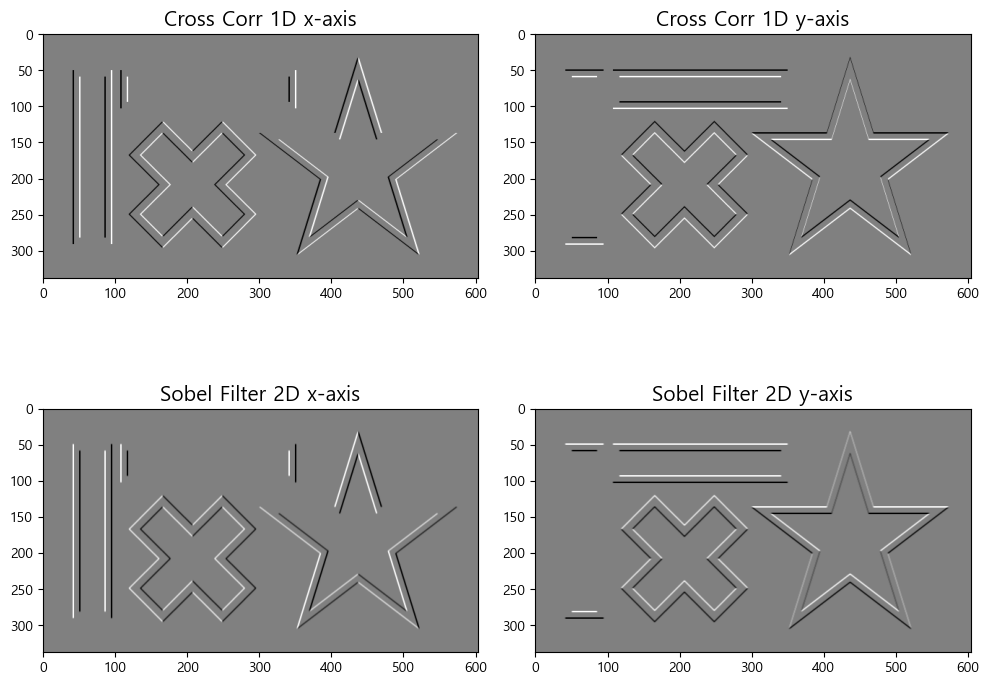

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

kernel_1d_x = np.array([-1, 0, 1])
kernel_1d_y = np.array([[-1], [0], [1]])
sobel_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

ax[0,0].imshow(cross_correlation_1d(img, kernel_1d_x), cmap="gray")
ax[0,0].set_title("Cross Corr 1D x-axis", size=15)
ax[0,1].imshow(cross_correlation_1d(img, kernel_1d_y), cmap="gray")
ax[0,1].set_title("Cross Corr 1D y-axis", size=15)
ax[1,0].imshow(cross_correlation_2d(img, sobel_x), cmap="gray")
ax[1,0].set_title("Sobel Filter 2D x-axis", size=15)
ax[1,1].imshow(cross_correlation_2d(img, sobel_y), cmap="gray")
ax[1,1].set_title("Sobel Filter 2D y-axis", size=15)

plt.tight_layout()
plt.show()

1-2. The Gaussian Filter

c:\Users\USER\anaconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


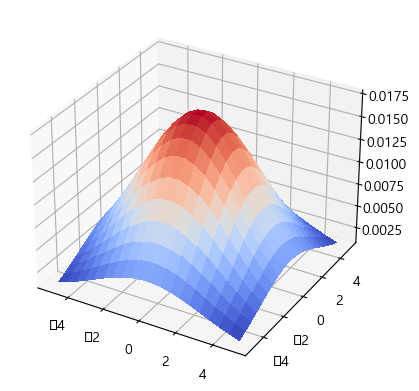

In [8]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

a = np.linspace(-5, 5, 20)
b = np.linspace(-5, 5, 20)
x, y = np.meshgrid(a, b)

surf = ax.plot_surface(x, y, gaussian(x, y, 3), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# visualize 2d gaussian distribution

plt.show()

In [9]:
# c) Print the results of get_gaussian_filter_1d(5,1) and get_gaussian_filter_2d(5,1) to the console.

get_gaussian_filter_1d(5,1)

array([0.05448868, 0.24420134, 0.40261995, 0.24420134, 0.05448868])

In [10]:
# c) Print the results of get_gaussian_filter_1d(5,1) and get_gaussian_filter_2d(5,1) to the console.

get_gaussian_filter_2d(5,1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

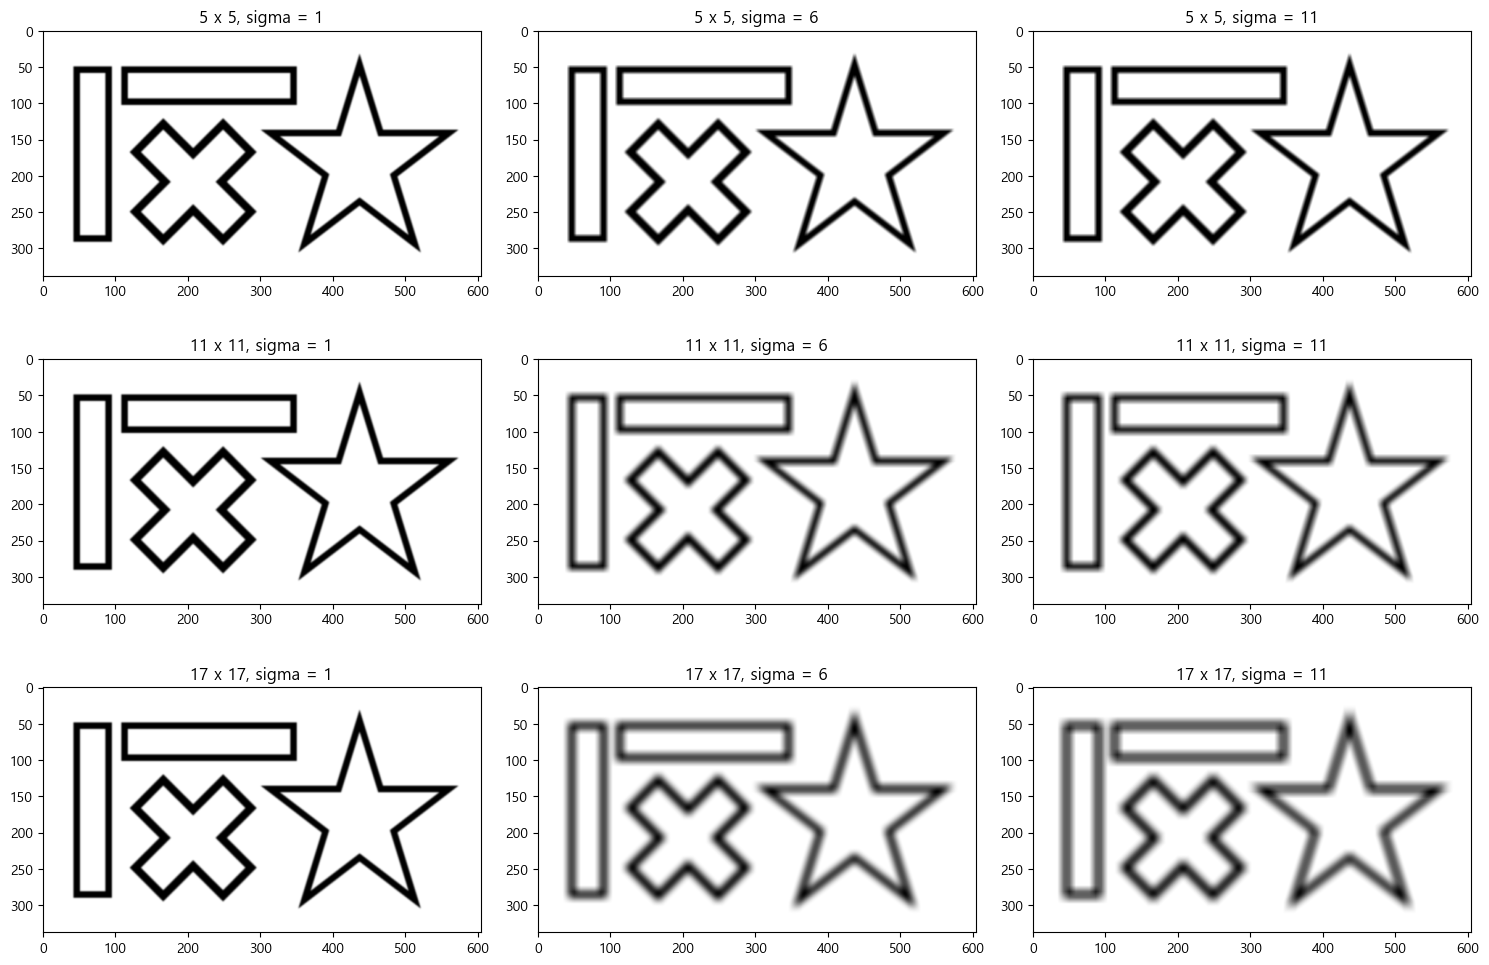

In [13]:
# d) Perform at least 9 different Gaussian filtering to an image (e.g., combinations of 3 different
# kernel sizes and sigma values). Show the filtered images in a single window.
# You are also asked to display a text caption describing the filter parameters on each filtered image.

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        size = 6*i+5
        sigma = 5*j+1
        kernel = get_gaussian_filter_2d(size=size, sigma=sigma)
        ax[i, j].imshow(cross_correlation_2d(img, kernel), cmap="gray")
        ax[i, j].set_title(f"{size} x {size}, sigma = {sigma}")

plt.tight_layout()
plt.show()

In [21]:
# e) Perform the Gaussian filtering by applying vertical and horizontal 1D kernels sequantially, and
# compare the result with a filtering with a 2D kernel. Specifically, visualize a pixel-wise
# difference map and report the sum of (absolute) intensity differences to the console. You are
# also required to report the computational times of 1D and 2D filterings to the console. Note
# that, you can report one of above 9 different cases (i.e. 17x17 s=6).

def compare_1d2d (img, size, sigma):
    start_1d = time.time()
    kernel_x = get_gaussian_filter_1d(size=size, sigma=sigma) # x-axis 1D gaussian filter
    kernel_y = kernel_x.copy().reshape(size, 1) # y-axis 1D gaussian filter
    filtered_x = cross_correlation_1d(img, kernel_x)
    filtered_xy_1d = cross_correlation_1d(filtered_x, kernel_y)
    end_1d = time.time() - start_1d

    # 2D kernels time evaluation
    start_2d = time.time()
    kernel = get_gaussian_filter_2d(size=size, sigma=sigma)
    filtered_xy_2d = cross_correlation_2d(img, kernel)
    end_2d = time.time() - start_2d

    return filtered_xy_1d, filtered_xy_2d, end_1d, end_2d

In [22]:
filter_1d, filter_2d, time_1d, time_2d = compare_1d2d (img, size=17, sigma=6)

In [33]:
print("1d filter vs 2d filter 차이 : {:.5f}".format(abs((filter_1d-filter_2d).sum())))
print("1d filter 소요시간 : {:.5f}".format(time_1d))
print("2d filter 소요시간 : {:.5f}".format(time_2d))

1d filter vs 2d filter 차이 : 0.00000
1d filter 소요시간 : 1.21777
2d filter 소요시간 : 1.13195
